In [168]:
# This script is designed to obtain accuracy of callers for each dataset D1-D6, as well as overall accuracy

# PROGRESS:
# D1: done
# D2: done
# D3: done
# D4: done
# D5: done
# D6: done

# SETUP - run only once

In [1]:
%matplotlib inline
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import ps2


#from google.colab import drive
#drive.mount('/content/gdrive')

caller_list = list() # holds names of all callers
twodig_list = list() # holds 2dig accuracies of all callers
fourdig_list = list() # holds 4dig accuracies of all callers

# Determining accuracy - run once per caller

## Setup

In [145]:
caller_name = input('What is name of caller ')
root1 = '../datasets/'
root2 = '../results/standard/{}'.format(caller_name)
fourdig = 0
twodig = 0
numsamples = 0

## Dataset 1

In [15]:
# D1 Accuracy

dir_1 =  root1+"1_gs.csv"
dir_2 =  root2+'_d1.csv'
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
four_dig=hit*100/len(pred_set)
fourdig = fourdig + hit

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  if gold_set[i][0:4] == pred_set[i][0:4]:
    hit +=1 
  elif pred_set[i][0:4] == gold_set[i-1][0:4]:
    hit += 1
  elif pred_set[i][0:4] == gold_set[i+1][0:4]:
    hit += 1

print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
two_dig = hit*100/len(pred_set)
twodig = twodig + hit

caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

4 Digit Accuracy is : 92.33333333333333  %
2 Digit Accuracy is : 97.66666666666667  %


## Dataset 2

### 4 Digit Res

In [63]:
# Run for D2 accuracy 4 dig res

dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[1]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass
#index list holds the order the prediction samples are in, relative to GS
#print(len(index_list))

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][2:8]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,6):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

numsamples += len(gold_set)
# 4 digit resolution
hit4 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(gold_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:7] for elem in allele_list_next)

      #print(allele_list_curr)

      if pred_set[i] in allele_list_curr:
        hit4 +=1 
      elif pred_set[i] in allele_list_prev:
        hit4 += 1
      elif pred_set[i] in allele_list_next:
        hit4 += 1
    else:
      if gold_set[i][0:7] == pred_set[i]:
        hit4 +=1 
      elif pred_set[i] == gold_set[i-1][0:7]:
        hit4 += 1
      elif pred_set[i] == gold_set[i+1][0:7]:
        hit4 += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
fourdig = fourdig + hit4


4 Digit Accuracy is : 76.08843537414965  %


### 2 Digit Res

In [64]:
# Run for D2 accuracy 2 dig res


dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[1]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass
#index list holds the order the prediction samples are in, relative to GS
#print(len(index_list))

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][2:8]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:4])

  for k in range(0,6):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

numsamples += len(gold_set)
# 2 digit resolution
hit2 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(pred_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:4] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:4] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:4] for elem in allele_list_next)

      if pred_set[i][0:4] in allele_list_curr:
        hit2 +=1 
      elif pred_set[i][0:4] in allele_list_prev:
        hit2 += 1
      elif pred_set[i][0:4] in allele_list_next:
        hit2 += 1
    else:
      if gold_set[i][0:4] == pred_set[i][0:4]:
        hit2 +=1 
      elif pred_set[i][0:4] == gold_set[i-1][0:4]:
        hit2 += 1
      elif pred_set[i][0:4] == gold_set[i+1][0:4]:
        hit2 += 1
  except:
    pass

print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
twodig = twodig + hit2


2 Digit Accuracy is : 78.40136054421768  %


In [65]:
two_dig=hit2*100/len(pred_set)
four_dig=hit4*100/len(pred_set)
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Dataset 3

In [103]:
# D3 Accuracy

dir_1 =  root1+"3_gs.csv"
dir_2 =  root2+"_d3.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')
#pre=pre.dropna()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:10])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
fourdig = fourdig + hit
four_dig=hit*100/len(pred_set)

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  try:
    if gold_set[i][0:7] == pred_set[i][0:7]:
      hit +=1 
    elif pred_set[i][0:7] == gold_set[i-1][0:7]:
      hit += 1
    elif pred_set[i][0:7] == gold_set[i+1][0:7]:
      hit += 1
  except:
    pass
  
print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
two_dig = hit*100/len(pred_set)
twodig = twodig + hit

caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

4 Digit Accuracy is : 76.74418604651163  %
2 Digit Accuracy is : 92.44186046511628  %


## Dataset 4

In [146]:
# D4 Accuracy DRB1 Only

dir_1 =  root1+"4_gs.csv"
dir_2 =  root2+"_d4.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')
#pre=pre.dropna()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:10])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
fourdig = fourdig + hit
four_dig=hit*100/len(pred_set)

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  try:
    if gold_set[i][0:7] == pred_set[i][0:7]:
      hit +=1 
    elif pred_set[i][0:7] == gold_set[i-1][0:7]:
      hit += 1
    elif pred_set[i][0:7] == gold_set[i+1][0:7]:
      hit += 1
  except:
    pass
  
print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
two_dig = hit*100/len(pred_set)
twodig = twodig + hit

caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

4 Digit Accuracy is : 0.0  %
2 Digit Accuracy is : 39.285714285714285  %


## Dataset 5

In [ ]:
# Run for d5 accuracy: monoallelic A and B only 
# i just brute force this for now because there are only 4 samples 

dir_1 =  root1+"5_gs.csv"
dir_2 =  root2+"_d5.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('A|B').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()

twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions_raw = pre[pre.columns[0]].to_list()
pre_accessions = list()
for i in pre_accessions_raw:
  pre_accessions.append(i[0:10])

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

numsamples += len(index_list)

# constructing standardized, stripped list of all alleles 
prediction = pre.values
pred_set = []

for i in range(0,len(index_list)):
  p_raw = prediction[index_list[i]][1:5]
  for i in p_raw:
    try: pred_set.append(i[0:7])
    except: pred_set.append('Z*00:00')


#sample 1
if (pred_set[0][0:7] == 'A*29:02') or pred_set[1][0:7] == 'A*29:02':
  fourdig_hit +=1 
if (pred_set[0][0:4] == 'A*29') or pred_set[1][0:4] == 'A*29':
  twodig_hit +=1 

#sample 2
if (pred_set[6][0:7] == 'B*51:01') or pred_set[7][0:7] == 'B*51:01':
  fourdig_hit += 1
if (pred_set[6][0:4] == 'B*51') or pred_set[7][0:4] == 'B*51':
  twodig_hit += 1

#sample 3
if (pred_set[10][0:7] == 'B*54:01') or pred_set[11][0:7] == 'B*54:01':
  fourdig_hit += 1
if (pred_set[10][0:4] == 'B*54') or pred_set[11][0:4] == 'B*54':
  twodig_hit += 1

#sample 4
if (pred_set[14][0:7] == 'B*57:01') or pred_set[15][0:7] == 'B*57:01':
  fourdig_hit += 1
if (pred_set[14][0:4] == 'B*57') or pred_set[15][0:4] == 'B*57':
  twodig_hit += 1
      

print('4 Digit Accuracy is :' , fourdig_hit*100/4, ' %')
fourdig = fourdig + fourdig_hit

print('2 Digit Accuracy is :' , twodig_hit*100/4, ' %')
two_dig = twodig_hit*100/len(pred_set)
twodig = twodig + twodig_hit

['GSM2450856', 'GSM2450857', 'GSM2450858', 'GSM2450855']
4 Digit Accuracy is : 100.0  %
2 Digit Accuracy is : 100.0  %


## Dataset 6

In [ ]:
# run for d6 accuracy: monoallelic C only

dir_1 =  root1+"6_gs.csv"
dir_2 =  root2+"_d6.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('C').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions_raw = pre[pre.columns[0]].to_list()
pre_accessions = list()
for i in pre_accessions_raw:
  pre_accessions.append(i[0:10])

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

numsamples += len(index_list)

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = gs[gs.columns[1]].to_list();
pred_set = []

for i in range(0,len(index_list)):
  p_raw = prediction[index_list[i]][1:3] #select C alleles only
  for i in p_raw:
    try: pred_set.append(i[0:7])
    except: pred_set.append('Z*00:00')



for i in range(8):
  if (pred_set[2*i][0:7] == gold_set[i]) or pred_set[2*i+1][0:7] == gold_set[i][0:7]:
    fourdig_hit +=1 
  if (pred_set[2*i][0:4] == gold_set[i][0:4]) or pred_set[2*i+1][0:4] == gold_set[i][0:4]:
    twodig_hit +=1 

print('4 Digit Accuracy is :' , fourdig_hit*100/8, ' %')
fourdig = fourdig + fourdig_hit

print('2 Digit Accuracy is :' , twodig_hit*100/8, ' %')
two_dig = twodig_hit*100/len(pred_set)
twodig = twodig + twodig_hit

['GSM3768246', 'GSM3768251', 'GSM3768247', 'GSM3768250', 'GSM3768244', 'GSM3768249', 'GSM3768245', 'GSM3768248']
[4, 6, 0, 2, 7, 5, 3, 1]
['C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01']
['C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01']
4 Digit Accuracy is : 100.0  %
2 Digit Accuracy is : 100.0  %


# Accuracy Plots

In [16]:
import seaborn as sns

## Overall Accuracy Plot

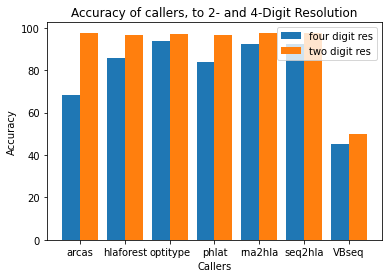

In [ ]:
#graph creation. only run once once all data is collected
X_axis = np.arange(len(caller_list))
plt.bar(X_axis - 0.2, fourdig_list, 0.4, label = 'four digit res')
plt.bar(X_axis + 0.2, twodig_list, 0.4, label = 'two digit res')
plt.xticks(X_axis, caller_list)
plt.xlabel('Callers')
plt.ylabel('Accuracy')
plt.title('Accuracy of callers, to 2- and 4-Digit Resolution')
plt.legend()

## D1 Accuracy Plot

In [17]:
d1_caller_list=caller_list
d1_twodig_list=twodig_list
d1_fourdig_list=fourdig_list
df1=pd.DataFrame(np.column_stack([d1_caller_list,d1_twodig_list,d1_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])

In [18]:
df1

,Callers,Two Digits,Four Digit
0,arcas,97.66666666666667,68.33333333333333
1,hlaforest,96.66666666666667,85.66666666666667
2,hlavbseq,97.66666666666667,88.66666666666667
3,optitype,97.33333333333333,94.66666666666667
4,phlat,95.66666666666667,83.66666666666667
5,rna2hla,97.66666666666667,92.33333333333333
6,seq2hla,97.66666666666667,92.33333333333333


In [19]:
df1=df1.melt(id_vars='Callers').rename(columns=str.title)
df1['Value'] = df1['Value'].astype(float)

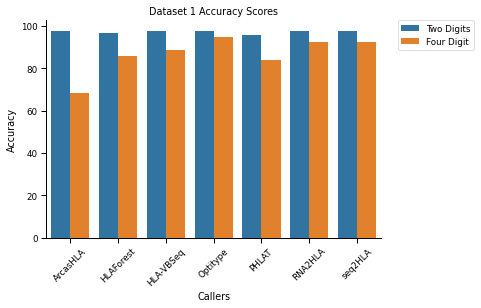

In [22]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df1)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 1 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d1_accuracy.png',bbox_inches ="tight",dpi=300)

## D2 Accuracy Plot

In [66]:
d2_caller_list=caller_list
d2_twodig_list=twodig_list
d2_fourdig_list=fourdig_list
df2=pd.DataFrame(np.column_stack([d2_caller_list,d2_twodig_list,d2_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df2=df2.melt(id_vars='Callers').rename(columns=str.title)
df2['Value'] = df2['Value'].astype(float)

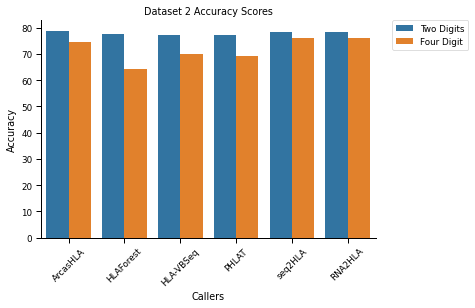

In [68]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df2)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','PHLAT','seq2HLA','RNA2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 2 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d2_accuracy.png',bbox_inches ="tight")

## D3 Accuracy Plot

In [104]:
d3_caller_list=caller_list
d3_twodig_list=twodig_list
d3_fourdig_list=fourdig_list
df3=pd.DataFrame(np.column_stack([d3_caller_list,d3_twodig_list,d3_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df3=df3.melt(id_vars='Callers').rename(columns=str.title)
df3['Value'] = df3['Value'].astype(float)

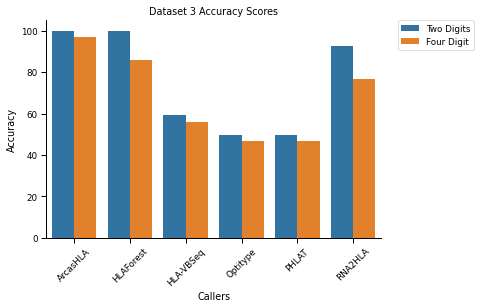

In [107]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df3)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','Optitype','PHLAT','RNA2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 3 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d3_accuracy.png',bbox_inches ="tight")

## D4 Accuracy Plot

In [123]:
d4_caller_list=caller_list
d4_twodig_list=twodig_list
d4_fourdig_list=fourdig_list
df4=pd.DataFrame(np.column_stack([d4_caller_list,d4_twodig_list,d4_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df4=df4.melt(id_vars='Callers').rename(columns=str.title)
df4['Value'] = df4['Value'].astype(float)

In [126]:
df4

,Callers,Variable,Value
0,arcas,Two Digits,14.285714
1,hlaforest,Two Digits,75.000000
2,hlavbseq,Two Digits,10.714286
3,optitype,Two Digits,0.000000
4,phlat,Two Digits,0.000000
5,rna2hla,Two Digits,42.857143
6,arcas,Four Digit,14.285714
7,hlaforest,Four Digit,46.428571
8,hlavbseq,Four Digit,10.714286
9,optitype,Four Digit,0.000000


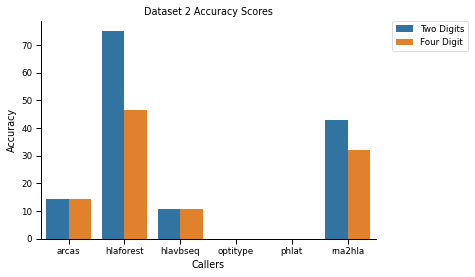

In [125]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df4)
#ax.set_xticklabels(['ArcasHLA','RNA2HLA','seq2HLA','HLA-VBSeq'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 2 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d4_accuracy.png',bbox_inches ="tight")

## D5 Accuracy Plot

In [ ]:
d5_caller_list=caller_list
d5_twodig_list=twodig_list
d5_fourdig_list=fourdig_list
df5=pd.DataFrame(np.column_stack([d5_caller_list,d5_twodig_list,d5_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df6=df6.melt(id_vars='Callers').rename(columns=str.title)
df5['Value'] = df5['Value'].astype(float)

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df5)
#ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'Optitype','PHLAT','RNA2HLA','seq2HLA','HLA-VBSeq'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 1 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('/content/gdrive/MyDrive/HLA_analysis/Figures/d5_accuracy.png',bbox_inches ="tight")

## D6 Accuracy Plot

In [ ]:
d6_caller_list=caller_list
d6_twodig_list=twodig_list
d6_fourdig_list=fourdig_list
df6=pd.DataFrame(np.column_stack([d6_caller_list,d6_twodig_list,d6_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df6=df6.melt(id_vars='Callers').rename(columns=str.title)
df6['Value'] = df6['Value'].astype(float)

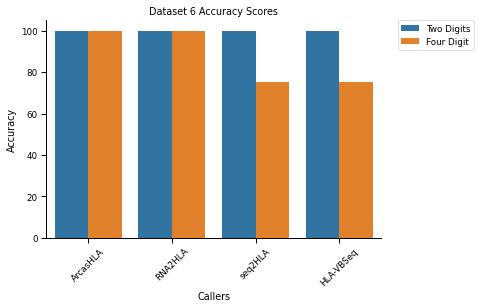

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df6)
ax.set_xticklabels(['ArcasHLA','RNA2HLA','seq2HLA','HLA-VBSeq'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 6 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('/content/gdrive/MyDrive/HLA_analysis/Figures/d6_accuracy.png',bbox_inches ="tight")